In [1]:
#Importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np
from numpy import random
%matplotlib inline
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from category_encoders import OneHotEncoder

In [2]:
#git_testes
data = pd.read_csv("https://raw.githubusercontent.com/lopeslopesedu/padroes/main/heart.csv",sep =",")
#local_testes
#data = pd.read_csv("C:/ifes/recpad/testes/data_sets/heart/heart.csv",sep =",")
#Quantidade de linhas e colunas do dataset
data.shape

(303, 14)

In [3]:
#Separa as características do target
X, y = data.drop('target', axis=1), data['target']
X.shape, y.shape, set(y)

((303, 13), (303,), {0, 1})

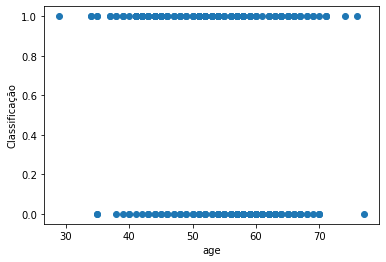

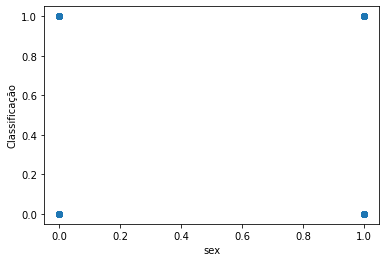

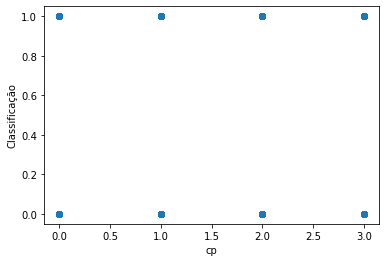

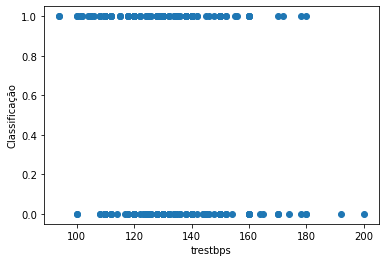

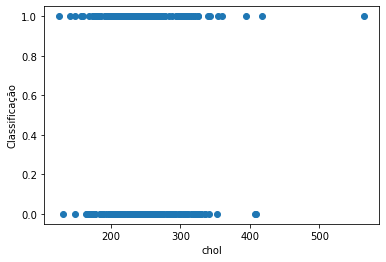

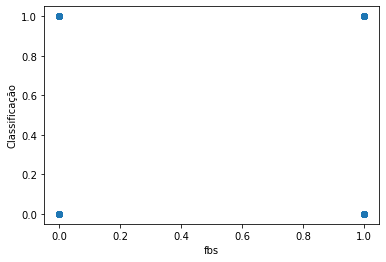

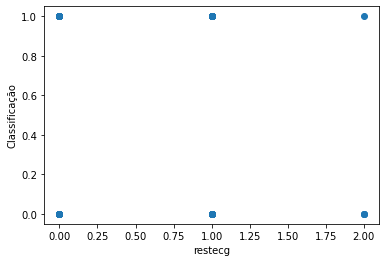

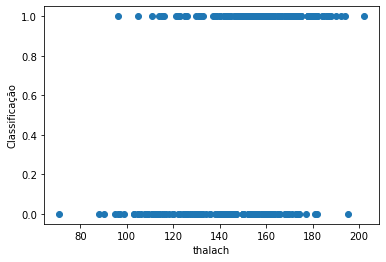

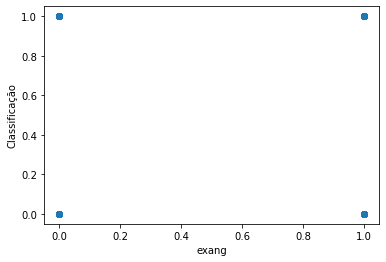

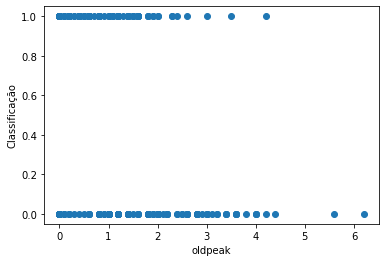

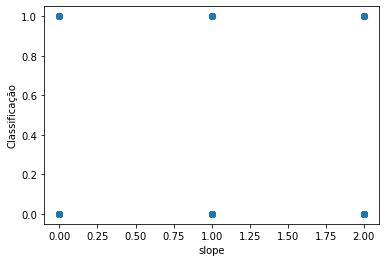

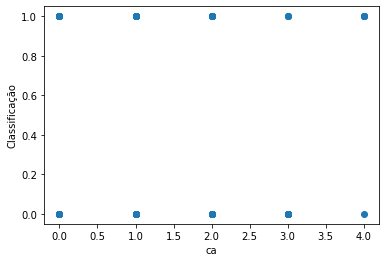

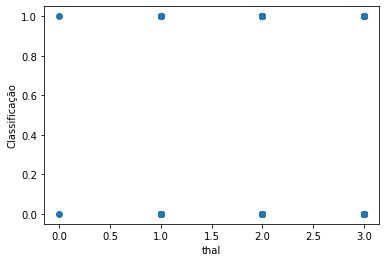

In [4]:
for i in range(X.shape[1]):
    plt.xlabel(X.columns[i])
    plt.ylabel("Classificação")
    plt.scatter(X[X.columns[i]], y)
    plt.show()

In [5]:
def avaliacao(X, y,pipeline_L,pipeline_K,k_fold_m,k_fold_s):
    #Logistic Regression
    parametros = {'logistic_regression__solver':['liblinear', 'sag']}
    modelo_logistic_regression = GridSearchCV(pipeline_L, parametros, scoring='accuracy', cv=k_fold_m)
    scores_lr = cross_validate(modelo_logistic_regression, X, y, scoring='accuracy', cv=k_fold_s)
    resultado_logistic_regression = np.mean(scores_lr['test_score'])

    # KNN
    modelo_knn = GridSearchCV(pipeline_K, {'k_nearest_neighbors__n_neighbors':[1,3,5,7,10]}, scoring='accuracy', cv=k_fold_m)
    scores_knn = cross_validate(modelo_knn, X, y, scoring='accuracy', cv=k_fold_s)
    resultado_knn = np.mean(scores_knn['test_score'])

    return resultado_logistic_regression, resultado_knn

In [6]:
#Prepara os pipelines
pipeline_Lspad = Pipeline([('cat_names', OneHotEncoder(use_cat_names=True)), ('sp', SimpleImputer(strategy='mean')),        
        ('logistic_regression', LogisticRegression())])
pipeline_Kspad = Pipeline([('cat_names', OneHotEncoder(use_cat_names=True)), ('sp', SimpleImputer(strategy='mean')),        
        ('k_nearest_neighbors', KNeighborsClassifier())])
pipeline_Lcpad = Pipeline([('cat_names', OneHotEncoder(use_cat_names=True)), ('sp', SimpleImputer(strategy='mean')),    
        ('std', StandardScaler()),('logistic_regression', LogisticRegression())])
pipeline_Kcpad = Pipeline([
        ('cat_names', OneHotEncoder(use_cat_names=True)),    ('sp', SimpleImputer(strategy='mean')),    
        ('std', StandardScaler()),('k_nearest_neighbors', KNeighborsClassifier())
        ])
# prepara as variaveis para receber todos os resultados
resultados_sempad = np.empty((10, 2))
resultados_compad = np.empty((10, 2))

In [7]:
#Loop realizando a avaliação
for i in range(10):
    estado = random.randint(50)
    k_fold_m = KFold(n_splits = 5,   shuffle=True, random_state=estado)
    k_fold_s = KFold(n_splits = 5,   shuffle=True, random_state=estado)
    resultados_sempad[i][0],resultados_sempad[i][1] = avaliacao(X, y,pipeline_Lspad,pipeline_Kspad,k_fold_m,k_fold_s)
    resultados_compad[i][0],resultados_compad[i][1] = avaliacao(X, y,pipeline_Lcpad,pipeline_Kcpad,k_fold_m,k_fold_s)





In [8]:
#Resultados sem padronização
resultados_sempad

array([[0.8384153 , 0.64704918],
       [0.83180328, 0.6568306 ],
       [0.83502732, 0.64032787],
       [0.82185792, 0.67284153],
       [0.83153005, 0.62382514],
       [0.83819672, 0.62721311],
       [0.82185792, 0.6173224 ],
       [0.82185792, 0.61355191],
       [0.84191257, 0.64371585],
       [0.83508197, 0.64355191]])

In [9]:
#Resultados com padronização
resultados_compad

array([[0.82857923, 0.8120765 ],
       [0.81857923, 0.82185792],
       [0.83174863, 0.82191257],
       [0.82519126, 0.8284153 ],
       [0.82830601, 0.82491803],
       [0.84808743, 0.83153005],
       [0.8152459 , 0.81863388],
       [0.81519126, 0.8184153 ],
       [0.83863388, 0.82213115],
       [0.83508197, 0.82180328]])

In [10]:
#Média dos Resultados com padronização
resultado_medio_compad = np.mean(resultados_compad,axis=0)
resultado_medio_compad

array([0.82846448, 0.8221694 ])

In [11]:
#Média dos Resultados sem padronização
resultado_medio_sempad = np.mean(resultados_sempad,axis=0)
resultado_medio_sempad

array([0.8317541 , 0.63862295])

In [12]:
#comparação
if(resultado_medio_compad[0]>resultado_medio_compad[1]):
    print("Utilizando Padronização o classificador LogisticRegression foi melhor")
if(resultado_medio_compad[0]<resultado_medio_compad[1]):
    print("Utilizando Padronização O classificador Knn foi melhor")
if(resultado_medio_compad[0]==resultado_medio_compad[1]):
    print("Utilizando PadronizaçãoAmbos tiveram resultado semelhantes")
    
        

Utilizando Padronização o classificador LogisticRegression foi melhor


In [13]:
#comparação
if(resultado_medio_sempad[0]>resultado_medio_compad[1]):
    print("Sem utilizar Padronização o classificador LogisticRegression foi melhor")
if(resultado_medio_sempad[0]<resultado_medio_compad[1]):
    print("Sem utilizar Padronização O classificador Knn foi melhor")
if(resultado_medio_sempad[0]==resultado_medio_compad[1]):
    print("Sem utilizar PadronizaçãoAmbos tiveram resultado semelhantes")

Sem utilizar Padronização o classificador LogisticRegression foi melhor


In [ ]:
#Sem utilizar Padronização o classificador LogisticRegression foi melhor
